<a href="https://colab.research.google.com/github/Suhail727/Data-Science-Projects/blob/master/IBM_Employee_Attrition_EDA_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import xgboost as xgb
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')

# Reading Data

In [0]:
data = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None)
#pd.reset_option(“max_columns”)
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [0]:
# describe
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

# Data Cleaning

In [0]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [0]:
null_feat = pd.DataFrame(len(data['Attrition']) - data.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(
        line=dict(color='#000000',width=1.5)))
layout = dict(title =  "Missing Values")
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [0]:
# There appear to be no null values in the data
# Check for data types
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [0]:
# Check target variable 'Attrition'
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [0]:
# Check Over18 variable 
data['Over18'].unique()

array(['Y'], dtype=object)

In [0]:
# Convert Attrition variable to int
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

# Drop useless features
# EmployeeCount is just sequential number
# StandardHours is same for everyone '80' and there is no deviation from that value
# Over18 is dropped as all employees are Over 18
data = data.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18'])
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        19479                   8      Yes                 11   
1        24907                   1       No                 23   
2         2396                   6      Yes                 15   
3        23159                   1      Yes                 11   
4        16632                   9       No                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

# Exploratory Data Analysis (EDA)

Distribution of Target Variable (Attrition)

In [0]:
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'],
        orientation = 'h', opacity = 0.8, 
        marker=dict(color=['gold', 'lightskyblue'],
                    line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of attrition variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = data['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

Atrrition vs Other variables

In [0]:
def plot_distribution(var_select, bin_size) : 
    # Calculate the correlation coefficient between the new variable and the target
    corr = data['Attrition'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]

    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [0]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Attrition'] != 0)]
    tmp2 = data[(data['Attrition'] == 0)]
    # For all values in selected variable, get count of Attrition and Non Attrition
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
    # Get Percentage of people with Attrition for each value in selected variable
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)
    
    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [0]:
# Age
plot_distribution('Age', False)
barplot('Age', False)
# Daily Rate 
plot_distribution('DailyRate', 100)

# Distance From Home
plot_distribution('DistanceFromHome', False)
barplot('DistanceFromHome', False)

plot_distribution('HourlyRate', False)
plot_distribution('MonthlyIncome', 100)
plot_distribution('MonthlyRate', 100)

# NumCompaniesWorked
plot_distribution('NumCompaniesWorked', False)
barplot('NumCompaniesWorked',False)
# PercentSalaryHike
plot_distribution('PercentSalaryHike', False)
barplot('PercentSalaryHike', False) 
# TotalWorkingYears
plot_distribution('TotalWorkingYears', False)
barplot('TotalWorkingYears', False)
# TrainingTimesLastYear
plot_distribution('TrainingTimesLastYear', False)
barplot('TrainingTimesLastYear',False)
# YearsAtCompany
plot_distribution('YearsAtCompany', False)
barplot('YearsAtCompany', False)
# YearsInCurrentRole
plot_distribution('YearsInCurrentRole', False)
barplot('YearsInCurrentRole', False)
# YearsSinceLastPromotion
plot_distribution('YearsSinceLastPromotion', False)
barplot('YearsSinceLastPromotion', False)
# YearsWithCurrManager
plot_distribution('YearsWithCurrManager', False)
barplot('YearsWithCurrManager', False)

In [0]:
def plot_pie(var_select) :
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [0]:
plot_pie("Gender")
barplot('Gender',True)
plot_pie('OverTime')
barplot('OverTime',True)
plot_pie('BusinessTravel')
barplot('BusinessTravel',True)
plot_pie('JobRole')
barplot('JobRole',True)
plot_pie('Department') 
barplot('Department',True)
plot_pie('MaritalStatus') 
barplot('MaritalStatus',True)
plot_pie('EducationField') 
barplot('EducationField',True)
plot_pie('Education') 
barplot('Education',False)
plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)
plot_pie('JobInvolvement')
barplot('JobInvolvement', False)
plot_pie('JobLevel')
barplot('JobLevel',False)
plot_pie('JobSatisfaction')
barplot('JobSatisfaction',False)
plot_pie('PerformanceRating')
barplot('PerformanceRating',False)
plot_pie('RelationshipSatisfaction')
barplot('RelationshipSatisfaction', False)
plot_pie('StockOptionLevel')
barplot('StockOptionLevel', False)
plot_pie('WorkLifeBalance')
barplot('WorkLifeBalance', False)

# Feature engineering and selection

In [0]:
def SalesDpt(data) :
    if data['Department'] == 'Sales':
        return 1
    else:
        return 0
data['SalesDpt'] = data.apply(lambda data:SalesDpt(data) ,axis = 1)

def JobInvCut(data) :
    if data['JobInvolvement'] < 2.5 :
        return 1
    else:
        return 0
data['JobInvCut'] = data.apply(lambda data:JobInvCut(data) ,axis = 1)

def MiddleTraining(data) :
    if data['TrainingTimesLastYear'] >= 3 and data['TrainingTimesLastYear'] <= 6:
        return 1
    else:
        return 0
data['MiddleTraining'] = data.apply(lambda data:MiddleTraining(data) ,axis = 1)

def MoovingPeople(data) :
    if data['NumCompaniesWorked'] > 4:
        return 1
    else:
        return 0
data['MoovingPeople'] = data.apply(lambda data:MoovingPeople(data), axis = 1)

data['TotalSatisfaction_mean'] = (data['RelationshipSatisfaction']  + data['EnvironmentSatisfaction'] + data['JobSatisfaction'] + data['JobInvolvement'] + data['WorkLifeBalance'])/5

def NotSatif(data) : 
    if  data['TotalSatisfaction_mean'] < 2.35 :
        return 1
    else : 
        return 0
data['NotSatif'] = data.apply(lambda data:NotSatif(data) ,axis = 1)

def LongDisWL1(data) : 
    if  data['DistanceFromHome'] > 11 and data['WorkLifeBalance'] == 1 :
        return 1
    else : 
        return 0
data['LongDisWL1'] = data.apply(lambda data:LongDisWL1(data) ,axis = 1)

def LongDis(data) : 
    if  data['DistanceFromHome'] > 11:
        return 1
    else : 
        return 0
data['LongDis'] = data.apply(lambda data:LongDis(data) ,axis = 1)

def LongDisJobS1(data) : 
    if  data['DistanceFromHome'] > 11 and data['JobSatisfaction'] == 1 :
        return 1
    else : 
        return 0
data['LongDisJobS1'] = data.apply(lambda data:LongDisJobS1(data) ,axis = 1)

def LongDisJL1(data) : 
    if  data['DistanceFromHome'] > 11 and data['JobLevel'] == 1 :
        return 1
    else : 
        return 0
data['LongDisJL1'] = data.apply(lambda data:LongDisJL1(data) ,axis = 1)

def ShortDisNotSingle(data) : 
    if  data['MaritalStatus'] != 'Single' and data['DistanceFromHome'] < 5:
        return 1
    else : 
        return 0
data['ShortDisNotSingle'] = data.apply(lambda data:ShortDisNotSingle(data) ,axis = 1)

def LongDisSingle(data) : 
    if  data['MaritalStatus'] == 'Single' and data['DistanceFromHome'] > 11:
        return 1
    else : 
        return 0
data['LongDisSingle'] = data.apply(lambda data:LongDisSingle(data) ,axis = 1)

def Engaged(data) : 
    if data['Age'] > 35 and data['MaritalStatus'] != 'Single':
        return 1
    else : 
        return 0
data['Engaged'] = data.apply(lambda data:Engaged(data) ,axis = 1)

def YoungAndBadPaid(data) : 
    if data['Age'] < 35 and data['Age'] > 23 and (data['MonthlyIncome'] < 3500):
        return 1
    else : 
        return 0
data['YoungAndBadPaid'] = data.apply(lambda data:YoungAndBadPaid(data) ,axis = 1)

def YoungNeverEngaged(data) : 
    if data['Age'] < 24 and data['MaritalStatus'] == 'Single' :
        return 1
    else : 
        return 0
data['YoungNeverEngaged'] = data.apply(lambda data:YoungNeverEngaged(data) ,axis = 1)

data['Time_in_each_comp'] = (data['Age'] - 20) / ((data)['NumCompaniesWorked'] + 1)
data['RelSatisf_mean'] = (data['RelationshipSatisfaction']  + data['EnvironmentSatisfaction']) / 2
data['JobSatisf_mean'] = (data['JobSatisfaction'] + data['JobInvolvement']) / 2
data['Income_Distance'] = data['MonthlyIncome'] / data['DistanceFromHome']
data['Hrate_Mrate'] = data['HourlyRate'] / data['MonthlyRate']
data['Stability'] = data['YearsInCurrentRole'] / data['YearsAtCompany']
data['Stability'].fillna((data['Stability'].mean()), inplace=True)
data['Income_YearsComp'] = data['MonthlyIncome'] / data['YearsAtCompany']
data['Income_YearsComp'] = data['Income_YearsComp'].replace(np.Inf, 0)
data['Fidelity'] = (data['NumCompaniesWorked']) / data['TotalWorkingYears']
data['Fidelity'] = data['Fidelity'].replace(np.Inf, 0)


In [0]:
barplot('Engaged', False)
barplot('YoungAndBadPaid', False)
barplot('YoungNeverEngaged', False)
barplot('LongDisSingle', False)
barplot('LongDisJL1', False)
barplot('ShortDisNotSingle', False)

In [0]:
# Remove Redundant variables
data = data.drop(columns=[
                        'Age',
                        'MonthlyIncome',
                        'YearsAtCompany',
                        'DistanceFromHome',
                        'PerformanceRating',
                        'NumCompaniesWorked'
                     ])

print ("\nMissing values :  ", data.isnull().sum().values.sum())


Missing values :   0


# Features encoding and scaling

In [0]:
# customer id col
Id_col     = ['EmployeeNumber']
# Target columns
target_col = ["Attrition"]
# categorical columns
cat_cols   = data.nunique()[data.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
# numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]
# Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
# Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")
data = data.drop(['EmployeeNumber'],axis = 1)

# Correlation Matrix

In [0]:
# correlation
correlation = data.corr()
# tick labels
matrix_cols = correlation.columns.tolist()
# convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        #height  = 1400,
                        #width   = 1600,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

Remove collinear features

In [0]:
# Threshold for removing correlated variables
threshold = 0.8

# Absolute value correlation matrix
corr_matrix = data.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

data = data.drop(columns = to_drop)

to_drop

There are 7 columns to remove :


['Department_Research & Development',
 'Department_Sales',
 'JobInvolvement_2',
 'JobInvolvement_3',
 'JobRole_Human Resources',
 'JobRole_Sales Executive',
 'TrainingTimesLastYear_2']

# Functions for Model Performance Visualisation

In [0]:
def model_performance_plot(model) : 
    #conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #plot roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False, 
                        subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance</b><br>'+str(model),
                        autosize = False, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

Define feature importance plot

In [0]:
def features_imp(model, cf) : 

    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data     = pd.DataFrame(list(data))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    layout = dict(title =  'Feature Importances xgb_cfl')
                    
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [0]:
#cumulative gain curve
def cum_gains_curve(model):
    pos = pd.get_dummies(y_test).to_numpy()
    pos = pos[:,1] 
    npos = np.sum(pos)
    index = np.argsort(y_score) 
    index = index[::-1] 
    sort_pos = pos[index]
    #cumulative sum
    cpos = np.cumsum(sort_pos) 
    #recall
    recall = cpos/npos 
    #size obs test
    n = y_test.shape[0] 
    size = np.arange(start=1,stop=369,step=1) 
    #proportion
    size = size / n 
    #plots
    model = 'xgb_cfl'
    trace1 = go.Scatter(x = size,y = recall,
                        name = "Lift curve",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace2 = go.Scatter(x = size,y = size,
                        name = "Baseline",
                        showlegend=False,
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))

    layout = dict(title = 'Cumulative gains curve'+' '+str(model),
                  yaxis = dict(title = 'Percentage positive targeted',zeroline = False),
                  xaxis = dict(title = 'Percentage contacted', zeroline = False)
                 )

    fig  = go.Figure(data = [trace1,trace2], layout = layout)
    py.iplot(fig)

In [0]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

# Modelling

In [0]:
# Def X and Y
y = np.array(data.Attrition.tolist())
data = data.drop('Attrition', 1)
X = np.array(data.to_numpy())

# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)

In [0]:
# XG Boost
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)


# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

random_search.fit(X_train, y_train)
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 35.8min finished



 All results:
{'mean_fit_time': array([ 2.44667544,  2.36185141,  2.09744043,  2.61310511,  0.66730623,
        2.94856057,  0.82103472,  0.52346163,  1.15596972,  0.49491091,
        0.78834262,  0.46051197,  2.13404832,  1.30386367,  2.40911236,
        0.65879331,  3.94276581,  0.42921104,  1.10817037,  1.10368657,
        1.47832136,  2.57547984,  1.06975231,  2.04562769,  3.67852969,
        0.8302671 ,  0.60064187,  0.66615829,  4.43908892,  1.66568122,
        3.65185699,  2.27947125,  3.08954082,  0.92740459,  2.76601586,
        4.45799055,  0.48447919,  5.47211294,  3.12261925,  2.658393  ,
        0.66940022,  1.53513775,  0.61332598,  0.48919296,  3.42506852,
        0.81284518,  1.8202054 ,  0.46347713,  1.51885862,  4.74609399,
        0.66194329,  0.96778336,  4.34919882,  3.66574068,  3.52305317,
        0.48674126,  0.59986997,  0.78553381,  1.78275251,  3.9629652 ,
        0.91161256,  2.20868011,  3.15145607,  4.41552839,  2.51675081,
        0.69934406,  2.98248067

In [0]:
# xgb 
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                           subsample=0.6)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
y_score = xgb_clf.predict_proba(X_test)[:,1]

model_performance_plot('xgb_clf')

In [0]:
features_imp(xgb_clf, 'features')

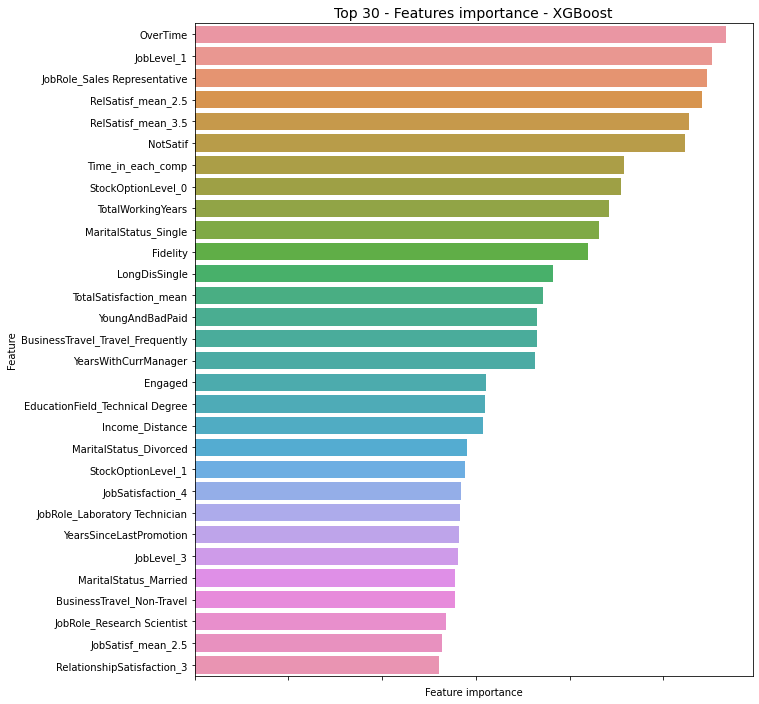

In [0]:
#feature importance plot TOP 40
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': list(data), 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(30)
    plt.figure(figsize = (10,12))
    plt.title('Top 30 - Features importance - XGBoost',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

plot_feature_importance(xgb_clf)

In [0]:
cum_gains_curve(xgb_clf)

In [0]:
# Cross val score
cross_val_metrics(xgb_clf)

[accuracy] : 0.88571 (+/- 0.01067)
[precision] : 0.82104 (+/- 0.05840)
[recall] : 0.37580 (+/- 0.06799)
